In [10]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
#import statsmodels.api as sm
import seaborn as sns
import matplotlib

matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [2]:
pd.set_option('display.max_columns',500) 
#출력시 생략 X

In [127]:
df1_val = pd.read_excel("BG_Univariate.xlsx",sheet_name="Validation")
df1_val=df1_val.set_index('VAL')
df1_train = pd.read_excel("BG_Univariate.xlsx",sheet_name="Train")
df1_train=df1_train.set_index('TRAIN')
df2_val = pd.read_excel("BG_Multivariate_Value.xlsx",sheet_name="Validation")
df2_val=df2_val.set_index('VAL')
df2_train = pd.read_excel("BG_Multivariate_Value.xlsx",sheet_name="Train")
df2_train=df2_train.set_index('TRAIN')
df3_val = pd.read_excel("BG_Multivariate_0_1.xlsx",sheet_name="Validation")
df3_val=df3_val.set_index('VAL')
df3_train = pd.read_excel("BG_Multivariate_0_1.xlsx",sheet_name="Train")
df3_train=df3_train.set_index('TRAIN')

In [128]:
cols=['Comment']
df2_val.drop(cols, axis=1, inplace=True)
df2_train.drop(cols, axis=1, inplace=True)
df3_val.drop(cols, axis=1, inplace=True)
df3_train.drop(cols, axis=1, inplace=True)

In [129]:
df2_val

,RNN_15,RNN_30,RNN_60,LSTM_15,LSTM_30,LSTM_60,SLSTM_15,SLSTM_30,SLSTM_60,BLSTM_15,BLSTM_30,BLSTM_60,GRU_15,GRU_30,GRU_60
VAL,,,,,,,,,,,,,,,
Sam_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_4,12.348254,20.032011,35.058868,12.714410,20.201773,35.618450,11.113446,18.124851,31.904629,11.407502,19.842045,35.741947,12.232445,19.157049,34.418507
Sam_5,11.030983,20.169693,33.031170,11.138407,19.638182,34.081615,10.909716,20.304680,34.685020,11.274434,20.125393,35.691242,10.601842,19.622520,34.607445
Sam_6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam_10,10.255667,15.723925,29.093735,8.830861,16.365564,28.707188,9.476698,15.699814,27.220388,8.993172,15.732971,31.237423,9.695850,17.592098,29.185032


In [130]:
df1_val=df1_val.dropna()
df1_train=df1_train.dropna()
df2_val=df2_val.dropna()
df2_train=df2_train.dropna()
df3_val=df3_val.dropna()
df3_train=df3_train.dropna()

In [131]:
df2_val

,RNN_15,RNN_30,RNN_60,LSTM_15,LSTM_30,LSTM_60,SLSTM_15,SLSTM_30,SLSTM_60,BLSTM_15,BLSTM_30,BLSTM_60,GRU_15,GRU_30,GRU_60
VAL,,,,,,,,,,,,,,,
Sam_4,12.348254,20.032011,35.058868,12.714410,20.201773,35.618450,11.113446,18.124851,31.904629,11.407502,19.842045,35.741947,12.232445,19.157049,34.418507
Sam_5,11.030983,20.169693,33.031170,11.138407,19.638182,34.081615,10.909716,20.304680,34.685020,11.274434,20.125393,35.691242,10.601842,19.622520,34.607445
Sam_10,10.255667,15.723925,29.093735,8.830861,16.365564,28.707188,9.476698,15.699814,27.220388,8.993172,15.732971,31.237423,9.695850,17.592098,29.185032
RMSE_MEAN,11.211635,18.641876,32.394591,10.894559,18.735173,32.802418,10.499953,18.043115,31.270012,10.558369,18.566803,34.223537,10.843379,18.790556,32.736995


In [132]:
df1_val=df1_val.drop(['RMSE_MEAN'])
df1_train=df1_train.drop(['RMSE_MEAN'])
df2_val=df2_val.drop(['RMSE_MEAN'])
df2_train=df2_train.drop(['RMSE_MEAN'])
df3_val=df3_val.drop(['RMSE_MEAN'])
df3_train=df3_train.drop(['RMSE_MEAN'])

In [133]:
df1_val=df1_val.sort_values(by=['VAL'],axis=0,ascending=True)
df1_val=df1_val.reset_index(drop=True)
df1_train=df1_train.sort_values(by=['TRAIN'],axis=0,ascending=True)
df1_train=df1_train.reset_index(drop=True)
df2_val=df2_val.sort_values(by=['VAL'],axis=0,ascending=True)
df2_val=df2_val.reset_index(drop=True)
df2_train=df2_train.sort_values(by=['TRAIN'],axis=0,ascending=True)
df2_train=df2_train.reset_index(drop=True)
df3_val=df3_val.sort_values(by=['VAL'],axis=0,ascending=True)
df3_val=df3_val.reset_index(drop=True)
df3_train=df3_train.sort_values(by=['TRAIN'],axis=0,ascending=True)
df3_train=df3_train.reset_index(drop=True)


In [135]:
df2_val

,RNN_15,RNN_30,RNN_60,LSTM_15,LSTM_30,LSTM_60,SLSTM_15,SLSTM_30,SLSTM_60,BLSTM_15,BLSTM_30,BLSTM_60,GRU_15,GRU_30,GRU_60
0,10.255667,15.723925,29.093735,8.830861,16.365564,28.707188,9.476698,15.699814,27.220388,8.993172,15.732971,31.237423,9.695850,17.592098,29.185032
1,12.348254,20.032011,35.058868,12.714410,20.201773,35.618450,11.113446,18.124851,31.904629,11.407502,19.842045,35.741947,12.232445,19.157049,34.418507
2,11.030983,20.169693,33.031170,11.138407,19.638182,34.081615,10.909716,20.304680,34.685020,11.274434,20.125393,35.691242,10.601842,19.622520,34.607445


In [196]:
#val_RNN15 = pd.concat(df1_val['RNN_15'],df2_val['RNN_15'],df3_val['RNN_15'])
val_RNN15 = pd.concat([df1_val['RNN_15'],df2_val['RNN_15'],df3_val['RNN_15']],axis=1)
val_RNN15.columns=['Uni','Mul_value','Mul_0_1']
train_RNN15 = pd.concat([df1_train['RNN_15'],df2_train['RNN_15'],df3_train['RNN_15']],axis=1)
train_RNN15.columns=['Uni','Mul_value','Mul_0_1']
val_RNN30 = pd.concat([df1_val['RNN_30'],df2_val['RNN_30'],df3_val['RNN_30']],axis=1)
val_RNN30.columns=['Uni','Mul_value','Mul_0_1']
train_RNN30 = pd.concat([df1_train['RNN_30'],df2_train['RNN_30'],df3_train['RNN_30']],axis=1)
train_RNN30.columns=['Uni','Mul_value','Mul_0_1']
val_RNN60 = pd.concat([df1_val['RNN_60'],df2_val['RNN_60'],df3_val['RNN_60']],axis=1)
val_RNN60.columns=['Uni','Mul_value','Mul_0_1']
train_RNN60 = pd.concat([df1_train['RNN_60'],df2_train['RNN_60'],df3_train['RNN_60']],axis=1)
train_RNN60.columns=['Uni','Mul_value','Mul_0_1']
#sns.boxplot(y=df2_val['RNN_15'])

In [186]:
#val_RNN15=val_RNN15.rename({'RNN_15':'val_1','RNN_15':'val_2','RNN_15':'val_3'},axis='columns')
val_RNN15.columns=['Uni','Mul_value','Mul_0_1']
val_RNN30.columns=['Uni','Mul_value','Mul_0_1']

In [187]:
#val_RNN15

,Uni,Mul_value,Mul_0_1
0,26.854633,10.255667,10.089300
1,10.834386,12.348254,10.239642
2,15.322060,11.030983,9.397933
3,10.052484,NaN,16.456289
4,9.357811,NaN,8.972085
5,16.549968,NaN,17.571289
6,9.669038,NaN,19.684538
7,9.289498,NaN,11.424256
8,18.685251,NaN,12.879079
9,19.775816,NaN,11.078821


Text(0.5, 1.0, '< RNN_15_VAL >')

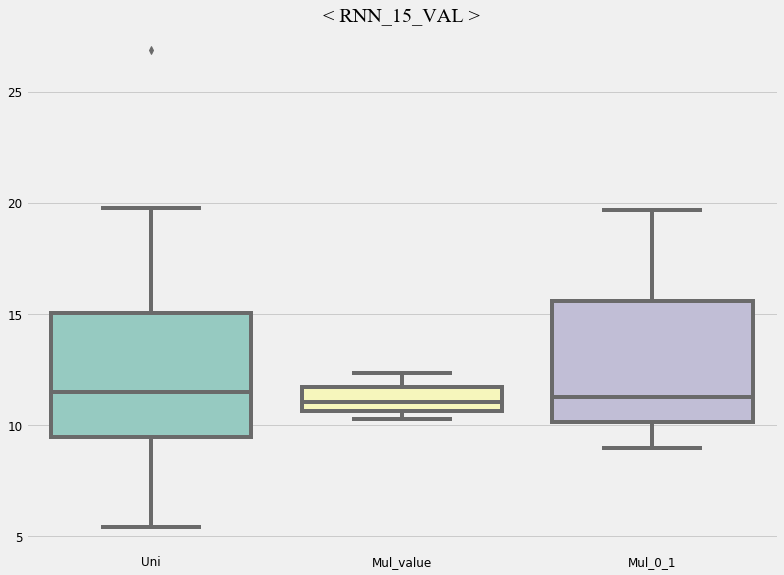

In [192]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_RNN15,palette="Set3")
plt.title('< RNN_15_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< RNN_15_TRAIN >')

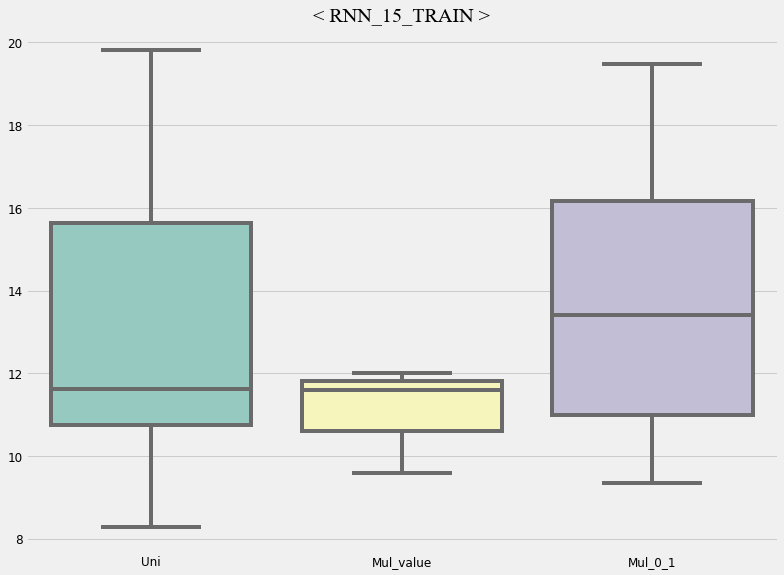

In [198]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_RNN15,palette="Set3")
plt.title('< RNN_15_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< RNN_30_VAL >')

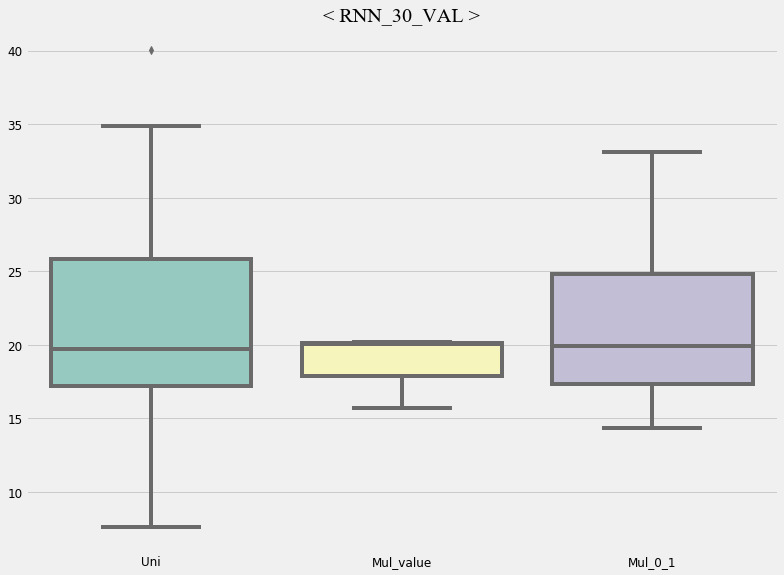

In [199]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_RNN30,palette="Set3")
plt.title('< RNN_30_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< RNN_30_TRAIN >')

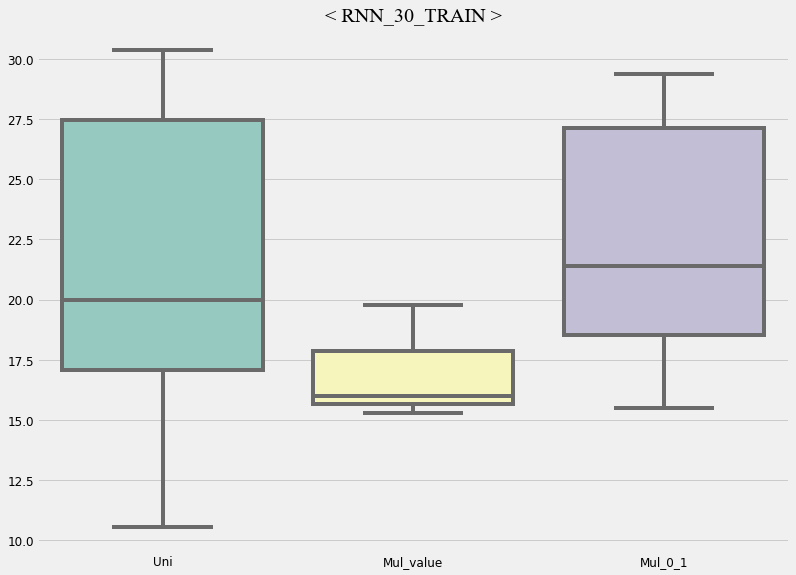

In [200]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_RNN30,palette="Set3")
plt.title('< RNN_30_TRAIN >',family='Times New Roman')

Text(0.5, 1.0, '< RNN_60_VAL >')

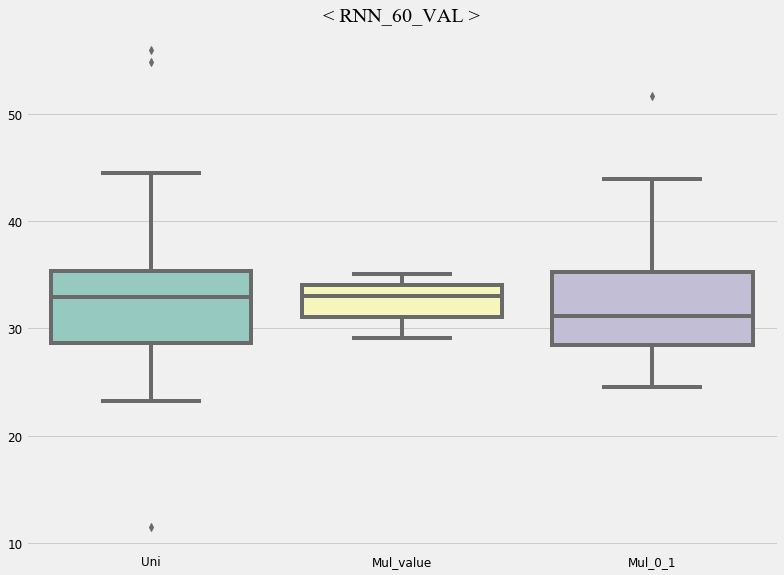

In [201]:
plt.figure(figsize=(12,9))
sns.boxplot(data=val_RNN60,palette="Set3")
plt.title('< RNN_60_VAL >',family='Times New Roman')

Text(0.5, 1.0, '< RNN_60_TRAIN >')

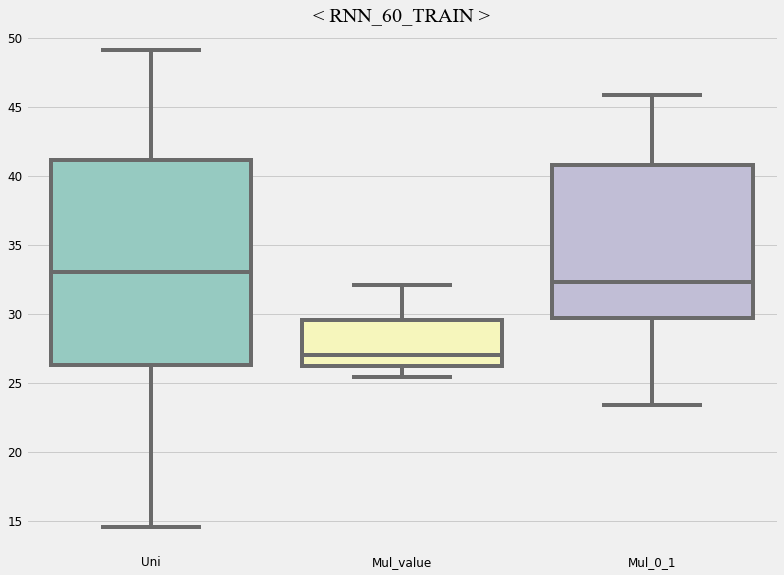

In [202]:
plt.figure(figsize=(12,9))
sns.boxplot(data=train_RNN60,palette="Set3")
plt.title('< RNN_60_TRAIN >',family='Times New Roman')